<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
iris_df = pd.read_csv("/content/iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [42]:
iris_df.shape

(150, 6)

In [55]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
iris_df[[i for i in iris_df.columns if iris_df[i].isnull().sum()]].isnull().sum()

Series([], dtype: float64)

In [134]:
#iris_df["Species"]

iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [131]:
y=iris_df.iloc[:,5]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [130]:

X = iris_df.iloc[:,0:5]
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
#iris_encoding =  pd.get_dummies(iris_df[["Species"]])
#iris_encoding_final = pd.concat([iris_df ,iris_encoding] ,1)
#iris_encoding_final.drop(["Species"] , axis=1) 
#df=loan_encoding_final.drop(["Result" , "Result_No"] , axis=1)
#df= iris_encoding_final
#df

In [132]:
iris_df.corr()

<ipython-input-132-1b33314f8075>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<ipython-input-133-04c31dd83c78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=iris_df.corr();


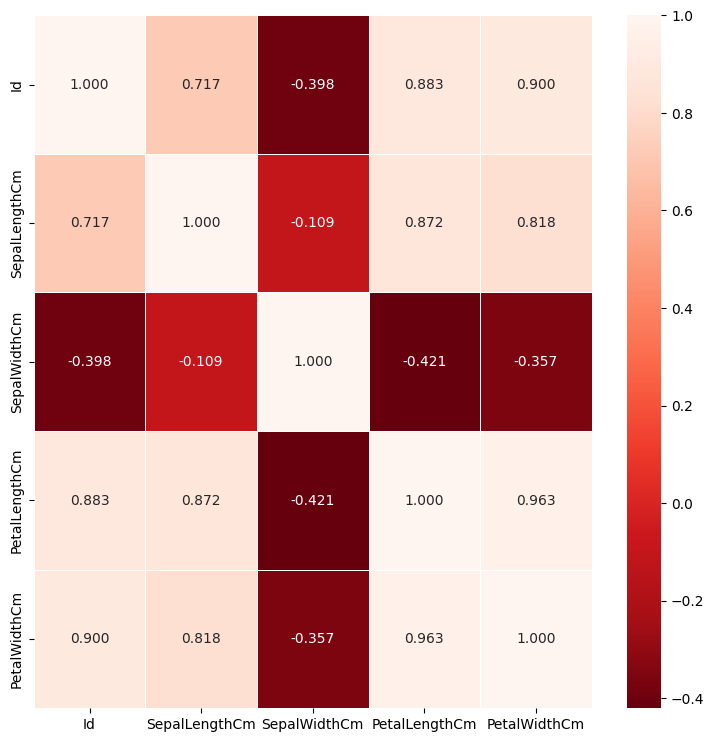

In [133]:
cor_mat=iris_df.corr();
fig,ax=plt.subplots(figsize=(9,9));
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f" , cmap = "Reds_r");

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test =train_test_split(X,y , test_size = 0.25 , random_state = 0)

In [136]:
X_train.shape, X_test.shape ,y_train.shape ,y_test.shape 

((112, 5), (38, 5), (112,), (38,))

In [143]:
 from sklearn.ensemble import RandomForestClassifier
 Rfc_model = RandomForestClassifier(n_jobs= 2 , random_state=  0)
 Rfc_model.fit(X_train , y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [144]:
score = Rfc_model.score(X_test,y_test)

score
     

1.0

In [148]:
pred = Rfc_model.predict(X_test)


In [150]:
from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test , pred) 
     
score2

1.0

In [155]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)

cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

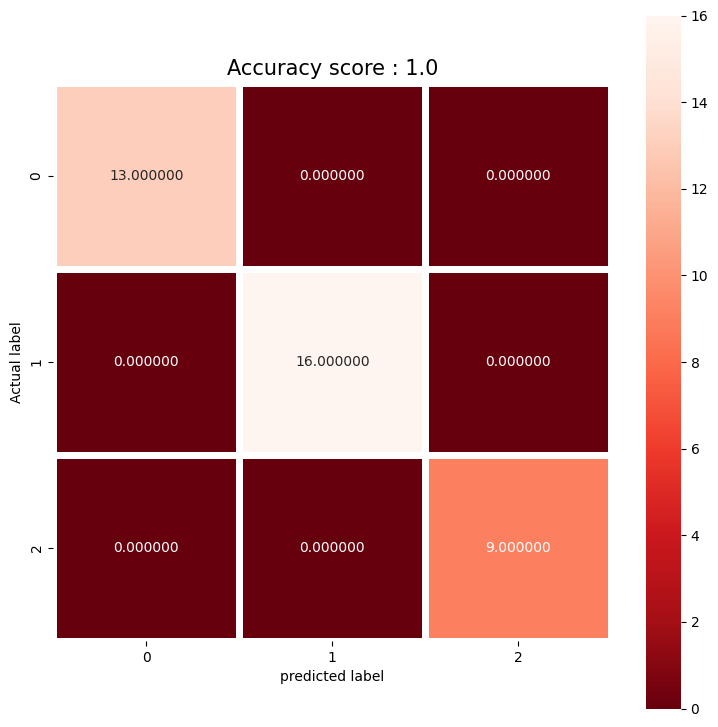

In [156]:

plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True ,fmt="3f" ,linewidths= 5, square = True ,cmap="Reds_r");
plt.ylabel("Actual label");
plt.xlabel ("predicted label");
all_sample_title = "Accuracy score : {0}".format( score2);
plt.title(all_sample_title ,size = 15);

In [157]:
 from sklearn.metrics import classification_report
 cp = classification_report(y_test,pred)
 print("classification _report" ,cp )

classification _report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

